# Python Scrum - Week 1 And 2

The objective of this execise is to load and explore the data from one of the Kaggle competitions. The data contains attributes and selling prices of residential homes in Ames, Iowa. 

## Import the data

In [17]:
# Load required packages
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sb
import feather as ft
from fancyimpute import KNN    

In [18]:
# set working directory
dir = '/Users/fridah/Documents/Busara/Organizational/Data team learning/Python scrum'
os.chdir(dir)

In [19]:
# Load the data
house_df = pd.read_csv(os.path.join(dir, 'Data/train.csv'))

# Structure of the data
print(house_df.columns)
dim = house_df.shape
print(dim)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [20]:
# Display the first 5 rows of the dataset 
house_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Data exploration
Here we will conduct descriptives on the data so as to identify any anomalies such as outliers, uneven disribution of categorical variables, etc

### Distribution of missing values

In [21]:
# Generate a dataset with vatiables and percentage of missing rows
miss = house_df.isnull().sum()*100/dim[0]
miss_df = pd.DataFrame({'variable': miss.index, 'perc_miss': miss}, index=None)
miss_df.sort_values('perc_miss', ascending=False, inplace=True)
print(miss_df.head(10))

# Select variables with more than 20% missing and drop them from the dataset
drop_vars = list(miss_df['variable'][miss_df['perc_miss']>20])
print(drop_vars)

try:
    house_df.drop(drop_vars,  inplace=True, axis = 1)
except ValueError:
    print("The columns have already been dropped.")
    

              perc_miss      variable
PoolQC        99.520548        PoolQC
MiscFeature   96.301370   MiscFeature
Alley         93.767123         Alley
Fence         80.753425         Fence
FireplaceQu   47.260274   FireplaceQu
LotFrontage   17.739726   LotFrontage
GarageYrBlt    5.547945   GarageYrBlt
GarageCond     5.547945    GarageCond
GarageType     5.547945    GarageType
GarageFinish   5.547945  GarageFinish
['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu']


### Impute missing values

In [24]:
# Create a list with continous variables
cont_vars = list(house_df2.select_dtypes(include=['int', 'float']).columns)
print(cont_vars)

# Replace missing values with NAN
house_df2 = house_df.copy()
for col in house_df2.columns:
    house_df2[col] = np.where(house_df2[col].isnull(), np.NaN, house_df2[col])

# Use KNN to impute the missing values : imputing contnous vars only
house_df2[cont_vars] = KNN(k=3).complete(house_df2[cont_vars])
house_df2.head(10)

['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']
Imputing row 1/1460 with 0 missing, elapsed time: 0.470
Imputing row 101/1460 with 1 missing, elapsed time: 0.474
Imputing row 201/1460 with 0 missing, elapsed time: 0.475
Imputing row 301/1460 with 0 missing, elapsed time: 0.476
Imputing row 401/1460 with 0 missing, elapsed time: 0.477
Imputing row 501/1460 with 0 missing, elapsed time: 0.478
Imputing row 601/1460 with 0 missing, elapsed time: 0.479
Imputing row 701/1460 with 0 missing, elapsed time: 0.480
Imputing row 801/1

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1.0,60.0,RL,65.000000,8450.0,Pave,Reg,Lvl,AllPub,Inside,...,0.0,0.0,0.0,0.0,0.0,2.0,2008.0,WD,Normal,208500.0
1,2.0,20.0,RL,80.000000,9600.0,Pave,Reg,Lvl,AllPub,FR2,...,0.0,0.0,0.0,0.0,0.0,5.0,2007.0,WD,Normal,181500.0
2,3.0,60.0,RL,68.000000,11250.0,Pave,IR1,Lvl,AllPub,Inside,...,0.0,0.0,0.0,0.0,0.0,9.0,2008.0,WD,Normal,223500.0
3,4.0,70.0,RL,60.000000,9550.0,Pave,IR1,Lvl,AllPub,Corner,...,272.0,0.0,0.0,0.0,0.0,2.0,2006.0,WD,Abnorml,140000.0
4,5.0,60.0,RL,84.000000,14260.0,Pave,IR1,Lvl,AllPub,FR2,...,0.0,0.0,0.0,0.0,0.0,12.0,2008.0,WD,Normal,250000.0
5,6.0,50.0,RL,85.000000,14115.0,Pave,IR1,Lvl,AllPub,Inside,...,0.0,320.0,0.0,0.0,700.0,10.0,2009.0,WD,Normal,143000.0
6,7.0,20.0,RL,75.000000,10084.0,Pave,Reg,Lvl,AllPub,Inside,...,0.0,0.0,0.0,0.0,0.0,8.0,2007.0,WD,Normal,307000.0
7,8.0,60.0,RL,73.426974,10382.0,Pave,IR1,Lvl,AllPub,Corner,...,228.0,0.0,0.0,0.0,350.0,11.0,2009.0,WD,Normal,200000.0
8,9.0,50.0,RM,51.000000,6120.0,Pave,Reg,Lvl,AllPub,Inside,...,205.0,0.0,0.0,0.0,0.0,4.0,2008.0,WD,Abnorml,129900.0
9,10.0,190.0,RL,50.000000,7420.0,Pave,Reg,Lvl,AllPub,Corner,...,0.0,0.0,0.0,0.0,0.0,1.0,2008.0,WD,Normal,118000.0


#### Check for outliers in continous variables

In [25]:
# Create a table with summaries
desc = house_df2[cont_vars].describe().T

# Rename some of the columns
desc.rename(columns={'25%':'Q1', '50%':'median', '75%':'Q3'}, inplace=True)

# Compute the Interquartile range
desc['IQR'] = desc['Q3'] - desc['Q1']

# Compute the major outlier lower and upper bounds
desc['L_MOutlier'] = desc['Q1']-3*desc['IQR']
desc['U_MOutlier'] = desc['Q3']+3*desc['IQR']

# Compute the quantiles of the continous variables and add this to the dataset
quants = pd.DataFrame(house_df2[cont_vars].quantile(0.99))
quants.columns = ['Quantile99']
desc2 = pd.concat([desc.reset_index(drop=True), quants.reset_index(drop=True)], axis=1)
desc2.index = cont_vars

# Diplay the new dataset
desc2.head(10)

,count,mean,std,min,Q1,median,Q3,max,IQR,L_MOutlier,U_MOutlier,Quantile99
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.2500,1460.0,729.5000,-1822.7500,3283.750000,1445.41
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.0000,190.0,50.0000,-130.0000,220.000000,190.00
LotFrontage,1460.0,70.891711,24.600036,21.0,60.00,70.0,80.3711,313.0,20.3711,-1.1133,141.484401,142.23
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.5000,215245.0,4048.0000,-4590.5000,23745.500000,37567.64
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.0000,10.0,2.0000,-1.0000,13.000000,10.00
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.0000,9.0,1.0000,2.0000,9.000000,9.00
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.0000,2010.0,46.0000,1816.0000,2138.000000,2009.00
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.0000,2010.0,37.0000,1856.0000,2115.000000,2009.00
MasVnrArea,1460.0,104.144755,181.297441,0.0,0.00,0.0,166.0000,1600.0,166.0000,-498.0000,664.000000,791.28
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.2500,5644.0,712.2500,-2136.7500,2849.000000,1572.41


In [26]:
# For each variable count the number of outyling observations
# Compute the 99% quantile too
out = []
for col in cont_vars:
    out.append(sum(house_df2[col]>desc2.loc[col, 'U_MOutlier']))

# Create a dataframe to hold the values
out_dict = {'Variable': cont_vars, 'no_outlying' : out}
out_df = pd.DataFrame.from_dict(out_dict)
out_df.sort_values('no_outlying', ascending=False, inplace=True)
out_df.head()

,Variable,no_outlying
30,EnclosedPorch,208
10,BsmtFinSF2,167
32,ScreenPorch,116
18,BsmtHalfBath,82
22,KitchenAbvGr,67


In [27]:
# Correct the outlying values : replace them with the 99% percentile value
# Create a list with variables that have atleast one major outlier
outlying_vars = list(out_df['Variable'][out_df['no_outlying']>0])
try:
    outlying_vars.remove('Id')
except ValueError:
    print("The column Id is not in the list")

for col in outlying_vars:
    house_df2.loc[house_df[col]>desc2.loc[col, 'U_MOutlier']] = desc2.loc[col, 'Quantile99']
        
house_df2[outlying_vars].describe().T.head()

The column Id is not in the list


,count,mean,std,min,25%,50%,75%,max
EnclosedPorch,1460.0,3529.334610,34929.260896,0.0,0.0,0.0,261.05,442567.01
BsmtFinSF2,1460.0,3529.334610,34929.260896,0.0,0.0,0.0,261.05,442567.01
ScreenPorch,1460.0,3529.334610,34929.260896,0.0,0.0,0.0,261.05,442567.01
BsmtHalfBath,1460.0,3529.334610,34929.260896,0.0,0.0,0.0,261.05,442567.01
KitchenAbvGr,1460.0,3529.895568,34929.204180,0.0,1.0,1.0,261.05,442567.01


## Descriptive statistics

Here we will conduct univariate and bivariate analyses of the data which will entail
1. Histograms for continous variables
2. Bar plots for categorical onces
3. Scatterplots to assess relationship between two contnous variables
4. Barplots to show relationship between continous and categorical variables and categorical and categorical variables

### Univariate analysis : Continous variables

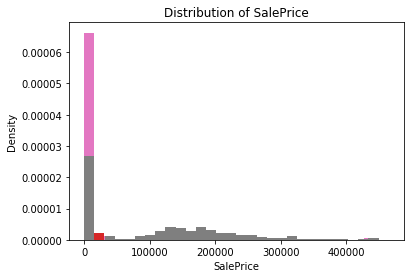

In [29]:
## Write a function to take a continous variables and plot a histogram with the pdf
def hist_vars(var_name, bins):
    # Create a list containing values of the variable to be plotted
    x = house_df2[var_name]
    
    # Compute the mean and standard deviation of the variable
    mu, sigma = np.mean(x), np.std(x)
    
    # Do the plot
    plt.hist(x, bins = bins, density = True)
    #plt.plot(x, 1/(sigma*np.sqrt(np.pi*2))*np.exp(-(x-mu)**2/(2*sigma**2)), linewidth=2, color='r')
    plt.xlabel(var_name)
    plt.ylabel('Density')
    plt.title('Distribution of '+var_name)
    plt.show
    plt.savefig(os.path.join(dir, var_name+'.png'))
    
## Using the function, loop through all the continous variables and plot the histogram
for var in cont_vars:
    hist_vars(var, 30)


### Univariate analysis : Categorical variables